In [18]:
print('Importing relevant libraries')
import glob

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

Importing relevant libraries


/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
path ="/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/*.csv"

print("Retrieving all .csv files within directory...")
all_csvs = glob.glob(path)

Retrieving all .csv files within directory...


In [13]:
all_csvs

['/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-06.csv',
 '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-07.csv',
 '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-08.csv',
 '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-09.csv',
 '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-10.csv',
 '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-11.csv',
 '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-12.csv']

In [14]:
status_161DF = pd.DataFrame()
_list = []
#csv = '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-06.csv'
for csv in all_csvs:
    status = pd.read_csv(csv, low_memory=False)
    status = status[["last_updated","station_id","num_bikes_available"]]

    status_161 = status[status["station_id"]==161]
    status_161 = status_161[["last_updated","num_bikes_available"]]

    status_161["last_updated"] = pd.to_datetime(status_161["last_updated"], unit='s')
    _list.append(status_161)
status_161DF = pd.concat(_list)

In [21]:
status_161Path = "/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/status_161.csv"
status_161DF.to_csv(status_161Path, sep=",",index=False)

In [16]:
status_161DF.sort_values(["last_updated"]).head(5)

,last_updated,num_bikes_available
15,2018-04-07 01:10:48,28
828,2018-04-07 01:31:44,28
1641,2018-04-07 01:32:57,30
2454,2018-04-07 01:33:51,30
3267,2018-04-07 01:34:54,30


In [17]:
dta = status_161DF
dta.index = pd.DatetimeIndex(status_161DF["last_updated"].values)
del dta["last_updated"]

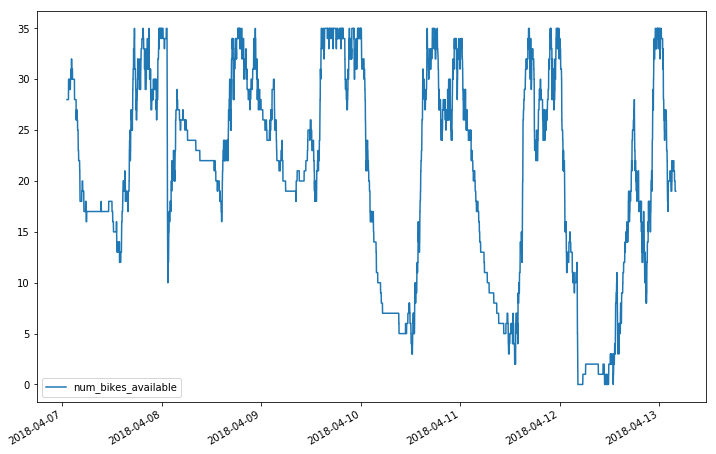

In [19]:
dta.plot(figsize=(12,8));

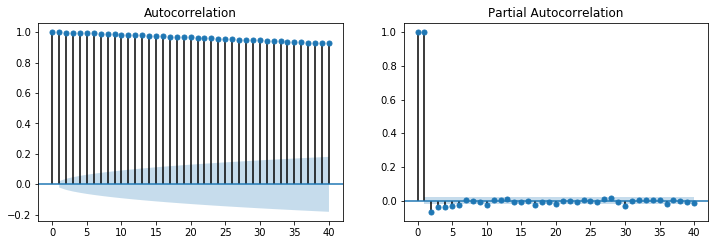

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)